<a href="https://colab.research.google.com/github/alupo933/Neural-Networks-Practice-work/blob/main/Neural_Network_Kaggle_Competition_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my first Kaggle competition. In it, I am using 79 explanatory varaiables to try and see if I can create a model that accurately, with minimal bias, is able to pridict the sale prices of House. The Title of the competition is: 

**House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting**

In [34]:
# Mount my notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn import set_config
set_config(display='diagram')

In [36]:
# Import the datasets
file1 = '/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/train.csv'
file2 = '/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/test.csv'
training_df = pd.read_csv(file1)
testing_df = pd.read_csv(file2)

print(training_df.head())
print(testing_df.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


First step is to explore and clean the data

In [37]:
training_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Next we will find define our features and target

In [39]:
#explore the numerical data
training_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [40]:
#Here we will assign the features and target
y = training_df['SalePrice']
X = training_df.drop(columns= ['LotFrontage', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'MiscFeature'])

In [41]:
y.value_counts(normalize=True)

140000    0.013699
135000    0.011644
155000    0.009589
145000    0.009589
190000    0.008904
            ...   
202665    0.000685
164900    0.000685
208300    0.000685
181500    0.000685
147500    0.000685
Name: SalePrice, Length: 663, dtype: float64

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [43]:
X.value_counts()

Series([], dtype: int64)

In [44]:
X.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,2.758904
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,40.177307
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,738.000000


In [45]:
# First we will find and drop duplicates
training_df.duplicated().sum()

0

In [46]:
training_df.duplicated().sum()

0

In [47]:
training_df.isnull().sum().sum()

6965

Look for any correlations in the data

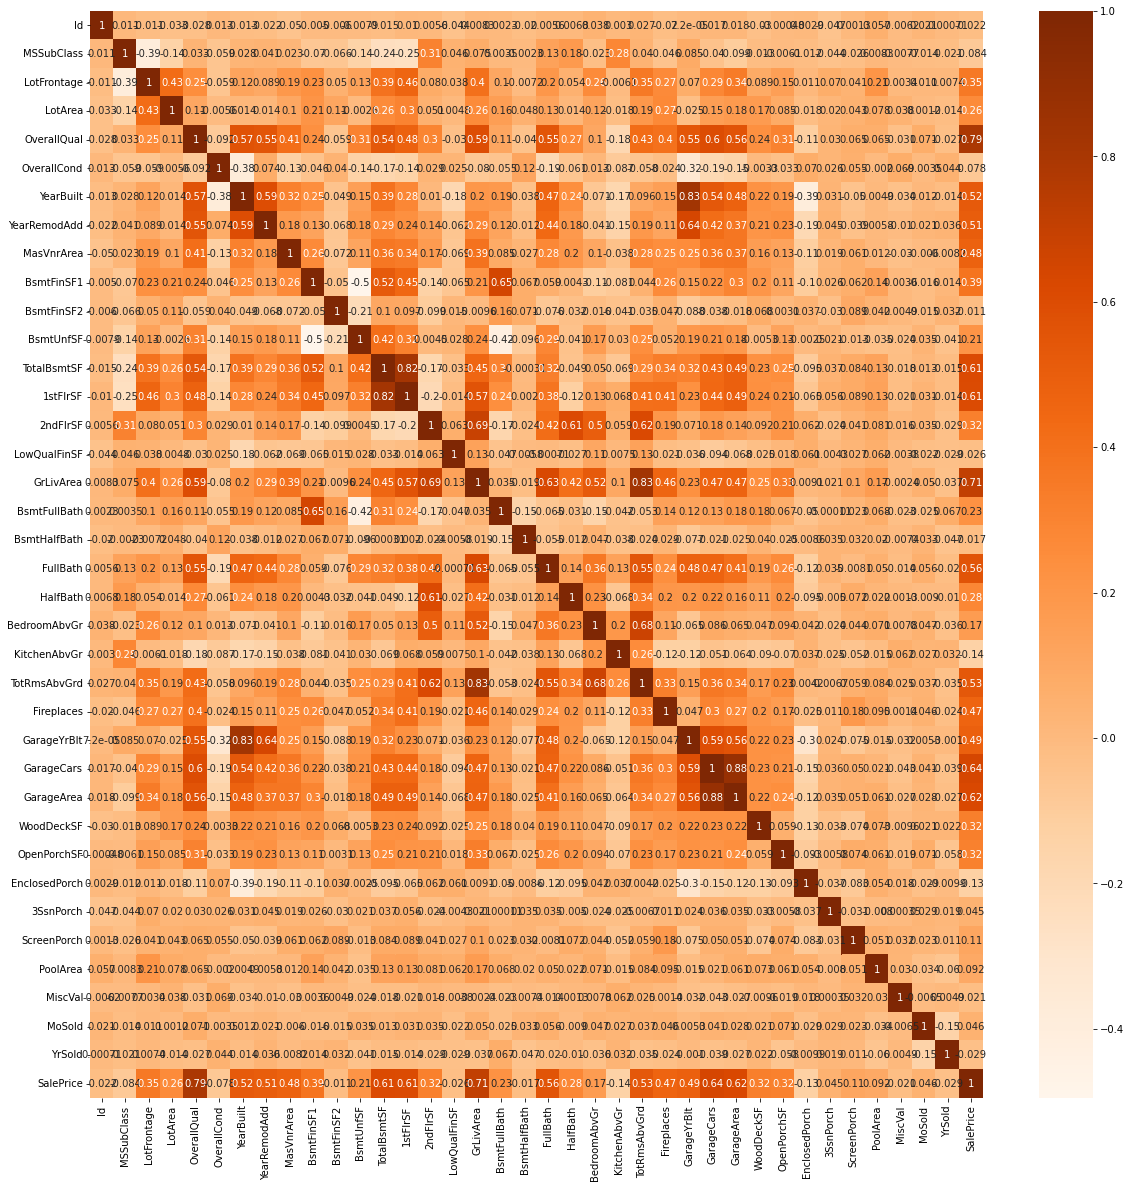

In [48]:
housing_corr=training_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(housing_corr, cmap='Oranges', annot=True);

There is missing data in multiple columns of the set, so we will have to create pipelines to replace that data.

In [49]:
# Next We will create a train/test/spit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1460)

In [50]:
# Next it's time to scale the data and create a pipeline to input missing values
# instantiate Scaler and One Hot encoder
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [51]:
# Make column selectors
number_selecter = make_column_selector(dtype_include=['number'])
category_selector = make_column_selector(dtype_include=['object'])

In [52]:
# Create imputers for the columns
mean_imputer = SimpleImputer(strategy='mean')
frequ_imputer = SimpleImputer(strategy='most_frequent')

In [53]:
# Create pipelines
number_pipe = make_pipeline(mean_imputer, scaler)
category_pipe = make_pipeline(frequ_imputer, ohe)

In [54]:
# Create tuples to put into the column transformer from the pipeline
number_tuple = (number_pipe, number_selecter)
category_tuple = (category_pipe, category_selector)

In [55]:
# Put the tuples into a column transformer
preprocessor = make_column_transformer(number_tuple, category_tuple) 
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f412f22ed90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f412f22e650>)])

In [56]:
# I will use a XGB model
# Instantiate the model
XGB = XGBRegressor()
# Next we'll make a XGB pipeline
xgb_pipe = make_pipeline(preprocessor, XGB)
# Fit the pipeline
xgb_pipe.fit(X_train, y_train)

[00:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f412f22ed90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f412f22e650>)])),
                ('xgbregressor', XGBRegressor())])

In [57]:
xgb_train_predict = xgb_pipe.predict(X_train)
xgb_test_predict = xgb_pipe.predict(X_test)

In [58]:
# NExt We will Create a Function to Evaluate our Model
def evaluate_model(y_true, y_pred):
  """takes two arrays, true labels and predicted labels, and prints
  MAE, MSE, RMSE, and R2 metrics"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE {rmse}')

In [59]:
# LEts predict the model performance on the training data
print('---'*20)
print('XGBoost Model Training Evaluation')
print('---'*20)
evaluate_model(y_train,xgb_train_predict)

------------------------------------------------------------
XGBoost Model Training Evaluation
------------------------------------------------------------
MAE 10256.809753139269
 MSE 189851498.81742564
 R^2 0.9675377299901354
 RMSE 13778.660995083144


In [60]:
# Let's create predictions for our testing model
print('---'*20)
print('XGBoost Model Testing Evaluation')
print('---'*20)
evaluate_model(y_test, xgb_test_predict)

------------------------------------------------------------
XGBoost Model Testing Evaluation
------------------------------------------------------------
MAE 17943.594991438356
 MSE 1057932616.1411946
 R^2 0.8621201975053298
 RMSE 32525.87610105521


# Next Let's use CV Search and Tune our model

In [61]:
xgb_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f412f22ed90>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_

In [62]:
# Define a dictionary of my parameters
parameter_dict = {'xgbregressor__base_score': range(0, 2),
                  'xgbregressor__max_depth': range(1,10, 2),
                  'xgbregressor__n_estimators': range(100, 300, 50),
                  'xgbregressor__objective': ['reg:squarederror']}

In [63]:
# Instantiate a gridssearch with the model and find the best parameters to use
grid = GridSearchCV(xgb_pipe, parameter_dict)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'xgbregressor__base_score': 1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 250, 'xgbregressor__objective': 'reg:squarederror'}


In [64]:
# Check the opimal combinations of the hyperparameters
best_xgb = grid.best_estimator_
best_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f412ce05c50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f412ce05910>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=1, n_estimators=250,
                              objective='reg:squarederror'))])

In [65]:
# Evaluate the best training data
print('---'*20)
print('XGBoost Model Training Evaluation')
print('---'*20)
evaluate_model(y_train, best_xgb.predict(X_train))

------------------------------------------------------------
XGBoost Model Training Evaluation
------------------------------------------------------------
MAE 7369.238809218036
 MSE 96884524.31699744
 R^2 0.9834339385901809
 RMSE 9842.993666410512


In [66]:
# Evaluate the best Testing Data
print('---'*20)
print('XGBoost Model Testing Evaluation')
print('---'*20)
evaluate_model(y_test, best_xgb.predict(X_test))

------------------------------------------------------------
XGBoost Model Testing Evaluation
------------------------------------------------------------
MAE 17151.742198202053
 MSE 1004429468.8369408
 R^2 0.8690932346067487
 RMSE 31692.735269095043


In [67]:
testing_df = testing_df.drop(columns= ['LotFrontage', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'MiscFeature'])

In [68]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          107 non-null    object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [69]:
submission = best_xgb.predict(testing_df)
submission

array([121372.55, 157868.92, 185245.12, ..., 153851.31, 123355.72,
       240728.7 ], dtype=float32)

In [70]:
submission = pd.Series(submission)

In [71]:
Idcolumn = testing_df['Id']
results = pd.concat([Idcolumn, submission], axis = 1)

In [72]:
results.to_csv('/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/results.csv')

#Neural Network Kaggle Exercise (Core)


Now, put neural networks into action. You are tasked with building a neural network using the data/Kaggle competition you choose in Week 8's Gradient Boosting Exercise. In this, you were instructed to compete in the Kaggle competition using a Gradient Boosting Machine. Now, compete in the competition you chose using a neural network. Do you get a better or worse score?

OPTIONAL Bonus/Challenge: You do not have to compete in the same competition, if you would like to compete in another Kaggle competition you are welcome to choose a new dataset for this assignment.

Please submit the 

1. Code file you used to build your model 

that includes

2. a screenshot of your results from the Kaggle competition inserted in text block at the end of your file. 

In [73]:
# First we will Fit and transform the preprocessor to the training data and transform the testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#Next We can define our sequential Model.

In [74]:
# Define the the network structure and save the number of features
input_shape = X_train.shape[1]
input_shape

72

In [75]:
# Import the correct libraries
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [76]:
from keras.callbacks import EarlyStopping
# Build the model using a Base Sequential Model
# Instantiate the model
house_model = Sequential()

# First Hidden Layer
house_model(Dense(72, input_dim = input_shape, activation = 'relu'))

# add 20% probability dropout
house_model.add(Dropout(.2))

#Second Hidden Layer
house_model.add(Dense(45, activation ='relu'))

# Add 20% Probability Dropout
house_model.add(Dropout(.20))

#Third Hidden Layer
house_model.add(Dense(15, activation = 'relu'))

#Fourth Hidden Layer
house_model.add(Dense(10, activation = 'relu'))

# Add output Layer
house_model.add(Dense(1, activation = 'linear'))

# Implement Early Stopping
early_stop = EarlyStopping(patience = 5)

# Compile the model

In [77]:
# Use Adam as the optimizer
house_model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [78]:
# Train the model, starting with 100 epochs
%%time
history = house_model.fit(X_train_transformed, y_train,
                          validation_data = (X_test_transformed, y_test),
                          epochs = 150,
                          callbacks = [early_stop])

Epoch 1/150
35/35 [==============================] - 1s 9ms/step - loss: 38262738944.0000 - mae: 180040.3125 - val_loss: 41353838592.0000 - val_mae: 183525.0469
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 38245822464.0000 - mae: 179995.6719 - val_loss: 41317953536.0000 - val_mae: 183433.7812
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 38176886784.0000 - mae: 179816.5000 - val_loss: 41196367872.0000 - val_mae: 183124.0312
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 37978288128.0000 - mae: 179296.2656 - val_loss: 40877555712.0000 - val_mae: 182311.0312
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 37520646144.0000 - mae: 178080.2969 - val_loss: 40200880128.0000 - val_mae: 180575.6094
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 36633178112.0000 - mae: 175728.2812 - val_loss: 38978420736.0000 - val_mae: 177391.6094
Epoch 7/150
35/35 [===============

In [79]:
# Create a function to plot the History
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = 'Training Loss')
  axes[0].plot(history.history['val_loss'], label='Testing Loss')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'Training Loss')
    axes[1].plot(history.history['val_' + metric], label = 'Testing Loss')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

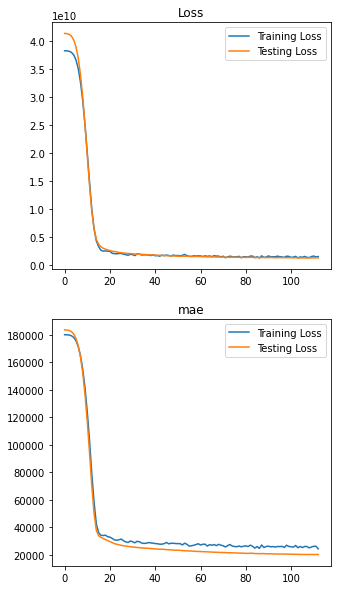

In [80]:
# Plot the history
plot_history(history, 'mae')

In [81]:
# Evaluate the Training Data
print('---'*15)
print('Nueral Network Training Evaluation')
print('---'*15)
evaluate_model(y_train, house_model.predict(X_train_transformed))

---------------------------------------------
Nueral Network Training Evaluation
---------------------------------------------
MAE 16497.976305650685
 MSE 877564329.9122078
 R^2 0.8499472987778107
 RMSE 29623.712291206986


In [82]:
# Evaluate the Testing Data
print('---'*15)
print('Nueral Network Testing Evaluation')
print('---'*15)
evaluate_model(y_test, house_model.predict(X_test_transformed))

---------------------------------------------
Nueral Network Testing Evaluation
---------------------------------------------
MAE 20050.570612157535
 MSE 1285762594.726311
 R^2 0.8324272359968169
 RMSE 35857.531910692225


In [84]:
testing_df2 = pd.read_csv(file2)

In [85]:
testing_df2 = testing_df2.drop(columns= ['LotFrontage', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'MiscFeature'])

In [86]:
testing_df2['PavedDrive'].value_counts()

Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64

In [87]:
testing_df2['PavedDrive'] = testing_df['PavedDrive'].map({'P' : 'Y',
                                                        'N' : 'N',
                                                         'Y' : 'Y'})

In [88]:
testing_df2['PavedDrive'].value_counts()

Y    1333
N     126
Name: PavedDrive, dtype: int64

In [94]:
# Transform the preprocessor to the testing data

scaled_testing_df2 = preprocessor.transform(testing_df2)

In [101]:
preds = house_model.predict(scaled_testing_df2)
preds

array([[110305.88 ],
       [156732.75 ],
       [182118.08 ],
       ...,
       [175989.8  ],
       [ 98487.914],
       [226014.23 ]], dtype=float32)

In [107]:
preds.shape

(1459, 1)

In [109]:
preds.dtype

dtype('float32')

In [111]:
preds = preds.flatten()

In [113]:
submission2 = pd.DataFrame({'Id': testing_df2['Id'],
                           'SalePrice': preds})
submission2.to_csv('submission2.csv', index= False)

In [114]:
submission2.to_csv('/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/kaggle_house_NN_results.csv')

My Neural Network was not quite as good as my XGBoost Model. 

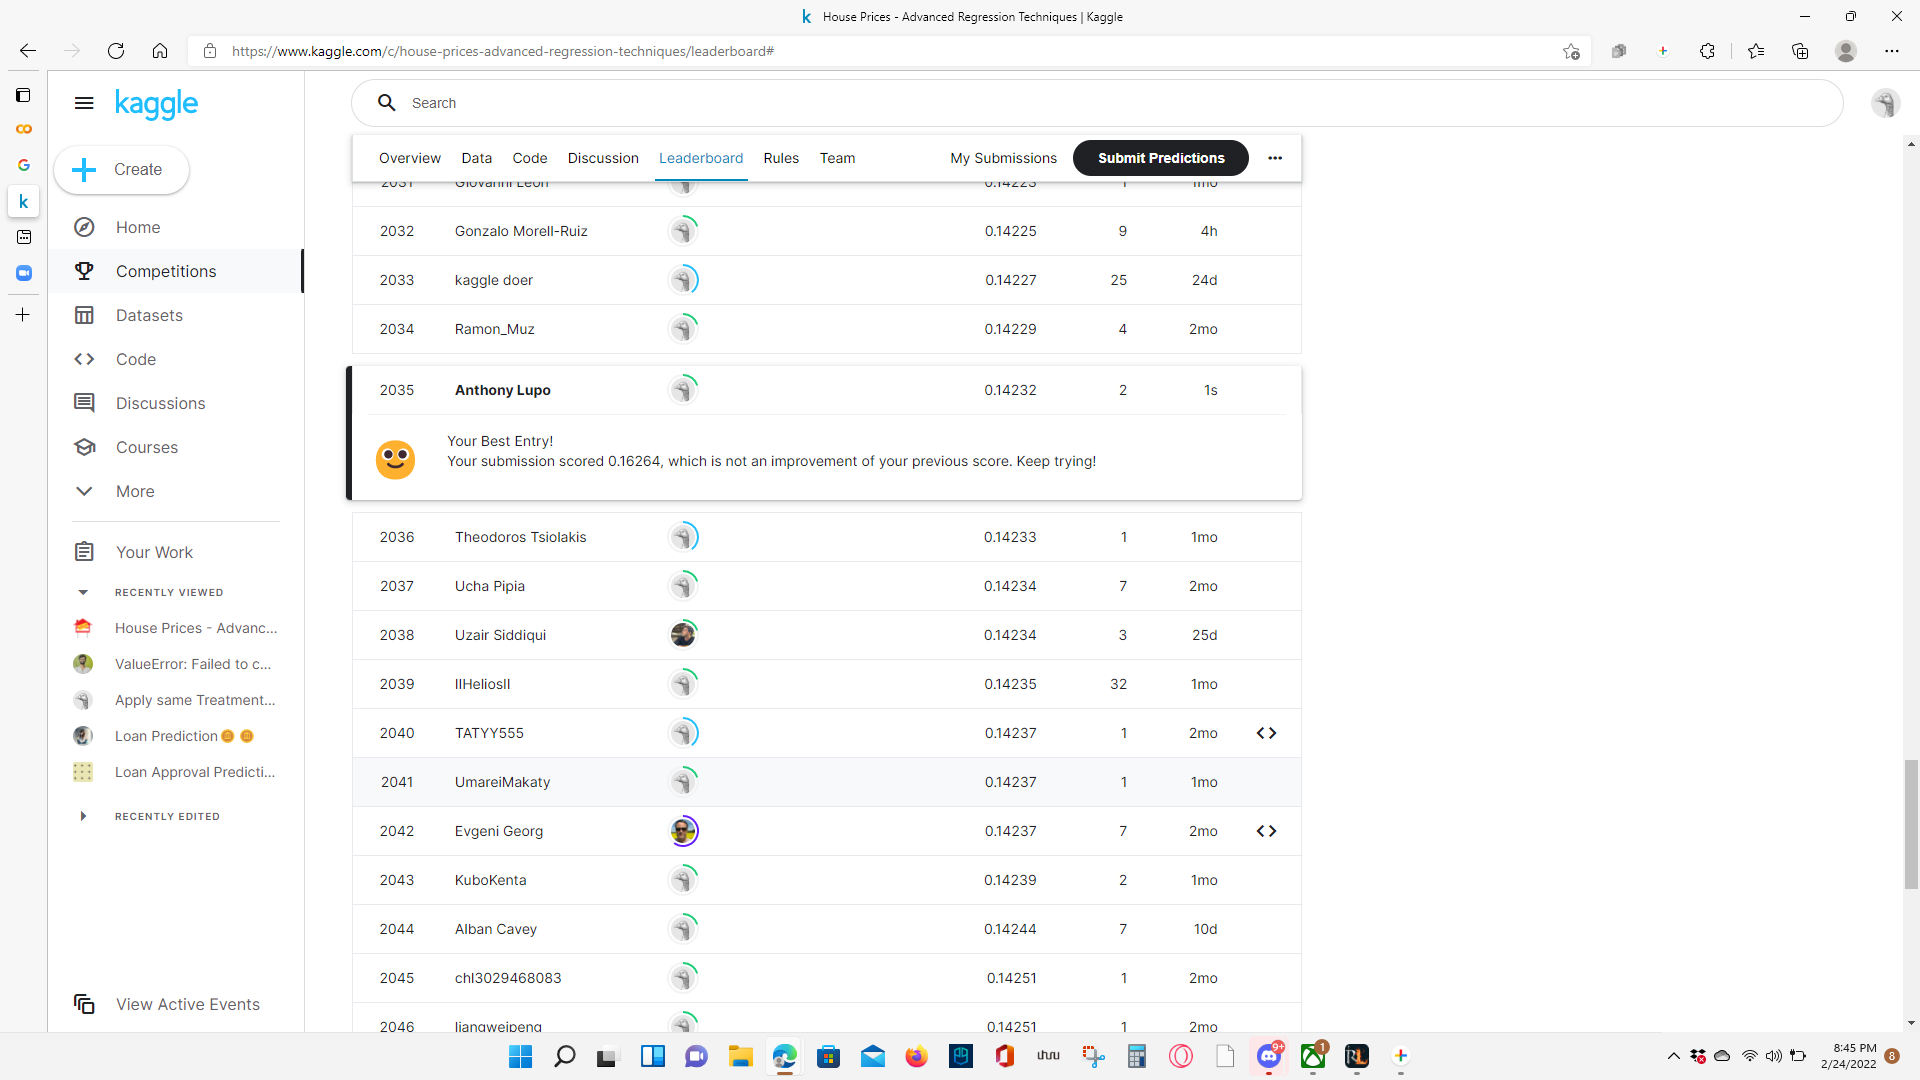